In [1]:
!pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from glob import glob
from PIL import Image
from numpy import asarray

In [5]:
dirct ='/media/rishav/Local Disk/Personal/MachineLearningProjects/Brain-Tumor-Detection/'

In [6]:
import os
path = os.listdir(dirct+'/Brain Tumor Data')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [7]:
no_tumor_frompath= dirct+'/Brain Tumor Data/Training/no_tumor'
no_tumor_topath = dirct+'/Brain Tumor Data/Agumented_Data/Training/no_tumor/'
no_tumor_images=glob(no_tumor_frompath+'/*')
c=0
for path in no_tumor_images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1

/tmp/ipykernel_18880/3892889325.py:10: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
/tmp/ipykernel_18880/3892889325.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
/tmp/ipykernel_18880/3892889325.py:16: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)


In [8]:
frompath = dirct+'Brain Tumor Data/Training/pituitary_tumor'
topath = dirct+'Brain Tumor Data/Agumented_Data/Training/pituitary_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

/tmp/ipykernel_18880/1661648098.py:10: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
/tmp/ipykernel_18880/1661648098.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
/tmp/ipykernel_18880/1661648098.py:16: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)


In [9]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth = dirct+'/Brain Tumor Data/Agumented_Data/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j)   
    # img = cv2.resize(img,dsize=(224,224))
    X.append(img)
    Y.append(classes[cls])

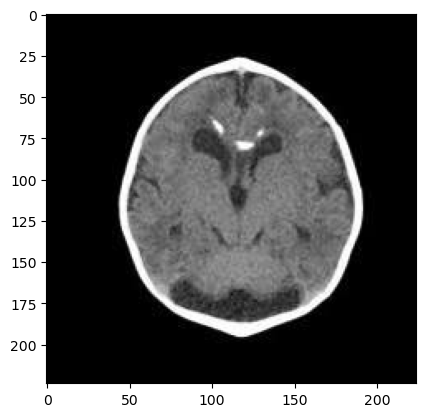

In [10]:
plt.imshow(X[0],cmap='gray')

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (224, 224, 3)
Shape of an image in x_test:  (224, 224, 3)


In [12]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test) 
print("x_train Shape: ", x_train.shape) 
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

2023-04-01 11:05:24.282765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 11:05:24.435193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rishav/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-01 11:05:24.435216: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-01 11:05:24.898201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dle

x_train Shape:  (3910, 224, 224, 3)
x_test Shape:  (978, 224, 224, 3)
y_train Shape:  (3910, 2)
y_test Shape:  (978, 2)


In [13]:
from keras.applications import vgg16

img_rows,img_cols=224,224

vgg=vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows,img_cols,3))

2023-04-01 11:05:28.499303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rishav/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-01 11:05:28.499331: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-01 11:05:28.499352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rishav): /proc/driver/nvidia/version does not exist
2023-04-01 11:05:28.499523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compile

In [14]:
for layer in vgg.layers:
  layer.trainable=False


In [15]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def lw(bottom_model,num_classes):
  top_model=bottom_model.output
  top_model=GlobalAveragePooling2D()(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(512,activation='relu')(top_model)
  top_model=Dense(num_classes,activation='softmax')(top_model)
  return top_model

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.models import Model

In [17]:
import tempfile

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__


In [18]:
make_keras_picklable()

In [19]:
num_classes=2
FC_Head=lw(vgg,num_classes)
model=Model(inputs=vgg.input,outputs=FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),verbose=1,initial_epoch=0)

Epoch 1/5


2023-04-01 11:05:47.269400: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 588564480 exceeds 10% of free system memory.
2023-04-01 11:05:48.240458: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-01 11:05:48.249078: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-04-01 11:05:48.394642: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-04-01 11:05:49.150746: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 102760448 exceeds 10% of free system memory.


123/123 [==============================] - 786s 6s/step - loss: 0.3884 - accuracy: 0.9353 - val_loss: 0.0687 - val_accuracy: 0.9785
Epoch 2/5
123/123 [==============================] - 834s 7s/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.0425 - val_accuracy: 0.9836
Epoch 3/5
123/123 [==============================] - 856s 7s/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0884 - val_accuracy: 0.9683
Epoch 4/5
123/123 [==============================] - 889s 7s/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0485 - val_accuracy: 0.9806
Epoch 5/5
123/123 [==============================] - 886s 7s/step - loss: 0.0250 - accuracy: 0.9900 - val_loss: 0.0073 - val_accuracy: 0.9980


In [22]:
import pickle
filename= 'brain_tumor_model.pkl'

In [23]:

pickle.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......conv2d_6
.........vars
............0
............1
......conv2d_7
.........vars
............0
............1
......conv2d_8
.........vars
............0
............1
......conv2d_9
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
..

In [4]:
load_model = pickle.load(open(filename,'rb'))
#load_model.predict(x_test)

2023-03-21 21:20:40.564385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 21:20:40.671616: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 21:20:40.671637: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-21 21:20:41.160193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-03-20 22:41:38     84145360
config.json                                    2023-03-20 22:41:36        12542
metadata.json                                  2023-03-20 22:41:36           64


2023-03-21 21:20:42.250624: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-21 21:20:42.250650: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-21 21:20:42.250667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rishav): /proc/driver/nvidia/version does not exist
2023-03-21 21:20:42.250832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......conv2d_6
.........vars
............0
............1
......conv2d_7
.........vars
............0
............1
......conv2d_8
.........vars
............0
............1
......conv2d_9
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
..

In [26]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [27]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [30]:
loaded_model.predict(x_test)

31/31 [==============================] - 186s 6s/step


array([[9.9999994e-01, 4.7917198e-10],
       [8.7774271e-07, 9.9999911e-01],
       [9.9999005e-01, 9.8449254e-06],
       ...,
       [7.0458255e-04, 9.9929541e-01],
       [1.3789128e-10, 1.0000000e+00],
       [5.6625770e-05, 9.9994338e-01]], dtype=float32)

In [24]:
dec= {0: 'No Tumor', 1:'Positive Tumor'}

In [25]:
plt.figure(figsize=(18,12))
p=os.listdir(path+'Brain Tumor Data/Training/pituitary_tumor')
c=1
predict_img=[]
for i in os.listdir(path+'Brain Tumor Data/Training/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread(path+'Brain Tumor Data/Training/pituitary_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= load_model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

FileNotFoundError: [Errno 2] No such file or directory: '/media/rishav/Local Disk/Personal/MachineLearningProjects/Brain-Tumor-Detection/Brain Tumor Data/Training/pituitary_tumor/p (99).jpgBrain Tumor Data/Training/pituitary_tumor'

<Figure size 1800x1200 with 0 Axes>

In [2]:
plt.figure(figsize=(18,12))
p=os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor')
c=1
predict_img=[]
for i in os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

NameError: name 'plt' is not defined